# CM3060 Natural Language Processing
### Coursework Assignment: Text classification

## Introduction

Sentiment analysis, a branch of text classification within Natural Language Processing (NLP), provides both theoretical frameworks and practical techniques for identifying emotions or attitude in text. It is used in numerous fields including social media analysis, product review assessment, customer service, and market research. This project explores key areas of NLP by selecting appropriate sentiment analysis methods and applying them to a real-world dataset, addressing a particular text classification challenge in interpreting customer feedback from online reviews.

### Problem area

According to a Local Consumer Review Survey (Yelp, 2012) "The majority of consumers surveyed use online reviews to make spending decisions." and "72% of consumers give the same weight to online reviews as they do to personal recommendations." Luca (2011) states that a one-star increase in Yelp rating leads to a 5-9 percent increase in revenue and that online consumer reviews substitute for more traditional forms of reputation. All of this suggests that online reviews are a valuable source of information for businesses and consumers alike.

One particular task that can be addressed with the review data is to track how customers opinion changes over time. For instance, a business made some changes to their product or service and wants to know how customers react to these changes. This can be done by analyzing the sentiment of reviews and identifying trends in customer feedback. However, the huge volume of text data generated by online reviews makes it difficult to manually analyze and interpret customer opinions. Star ratings are not always available and not always reliable indicator of customer satisfaction, as they may not reflect the actual sentiment of the review text. Sentiment analysis provides a solution to this problem by automatically classifying the sentiment of text, allowing businesses to efficiently analyze customer feedback, track tendencies, and make informed decisions.

With the rapid development of NLP and machine learning, a number of pre-trained sentiment analysis methods have been proposed. There are free and commercial sentiment analysis tools available, that divide into three main categories: rule-based systems, machine learning algorithms, and deep learning models. Here are some examples from each category:

* [Natural Language Toolkit (NLTK)](https://www.nltk.org/) a Python NLP library that provides both rule-based and machine learning-based sentiment analysis tools. In particular, `nltk.sentiment.vader` module implements a rule-based sentiment analysis tool using VADER (Valence Aware Dictionary and sEntiment Reasoner) (Hutto, C.J., Gilbert, E.E., 2014). A `nltk.sentiment.sentiment_analyzer` module implements a machine learning-based sentiment analysis tool that uses a Naive Bayes classifier (Martiti, Juliane C., 2021.)

* [TextBlob](https://textblob.readthedocs.io/en/dev/) another Python library for processing textual data. It also provides two sentiment analysis implementations: PatternAnalyzer, based on a `pattern` library, and NaiveBayesAnalyzer, a Naive Bayes classifier trained on a movie reviews corpus.

* [Hugging Face Pipelines](https://huggingface.co/docs/transformers/main_classes/pipelines) is an abstraction built on top of the [Transformers](https://huggingface.co/transformers/) library that provides a simple API to use pre-trained models for a variety of NLP tasks. It includes a sentiment analysis pipeline that by default uses a DistilBERT model (Sanh V., et al., 2020) finetuned on the [SST-2](https://huggingface.co/datasets/sst2) dataset. Another currently cunsidered state-of-the-art model for sentiment analysis is BERT (Devlin, J., et al., 2018), which is also available in the Transformers library.

However, these tools may not always perform well in a specific area. For example, the sentiment of a review may be influenced by the product category, and the same word may have different meanings in different domains. While these tools can give a baseline level of performance for comparison, creating a model tailored to a specific domain could enhance the accuracy of classifying sentiments.

### Objectives

The main goal of this project is to develop a machine learning model for sentiment analysis of online reviews. This model will be trained using a dataset of customer reviews at Yelp, applying supervised learning methods. The star ratings accompanying the reviews will serve as labels. We will evaluate both categorical and regression models, as the star ratings can be treated as both categorical and continuous variables. Also, both rule-based and machine learning-based models will be considered.

The performance of the model will be compared against pre-trained sentiment analysis tools mentioned above, as well as baseline models. Through this comparison, the project aims to determine whether a domain-specialized model can enhance the accuracy of sentiment detection in specific context.

Additionally, the project will explore how star ratings in online reviews correlate with expressed sentiments. This investigation will contribute to a deeper understanding of sentiment analysis within NLP, providing meaningful insights for both the business sector and academic researchers.

### Dataset

The [Yelp Open Dataset](https://www.yelp.com/dataset) is a dataset provided by Yelp Inc contains a curated sample of Yelp's businesses, reviews, and user data. As stated in their [terms of use](https://s3-media0.fl.yelpcdn.com/assets/srv0/engineering_pages/f64cb2d3efcc/assets/vendor/Dataset_User_Agreement.pdf), "The Data is made available by Yelp Inc. (“Yelp”) to enable you to access valuable local information to develop an academic project as part of an ongoing course of study." Therefore, the dataset is suitable and permitted for use in this project.

The dataset is available in JSON format and can be downloaded from [here](https://www.yelp.com/dataset/) upon request. Yelp provides a documentation for the dataset [here](https://www.yelp.com/dataset/documentation/main). The dataset contains 6,685,900 reviews, 192,609 businesses, 200,000 pictures covering 10 metropolitan areas. The dataset is regularly updated and the current version (as of 19 December 2020) contains 8,021,122 reviews, 209,393 businesses, 1,334,097 pictures covering 11 metropolitan areas. For the purpose of this project, a `yelp_academic_dataset_review.json` will be used which contains the following fields:

| Field      | Example | Description |
| ----------- | ------ | ----------- |
| review_id | zdSx_SD6obEhz9VrW9uAWA | string, 22 character unique review id |
| user_id | Ha3iJu77CxlrFm-vQRs_8g | string, 22 character unique user id, maps to the user in user.json |
| business_id | tnhfDv5Il8EaGSXZGiuQGg | string, 22 character business id, maps to business in business.json |
| stars | 4 | integer, star rating |
| date | 2016-03-09 | string, date formatted YYYY-MM-DD |
| text | Great place to hang out after work | string, the review itself |
| useful | 0 | integer, number of useful votes received |
| funny | 0 | integer, number of funny votes received |
| cool | 0 | integer, number of cool votes received |

More detailed exploratory analysis of the dataset can be found below.

### Critical analysis

The "stars" field contains a number of starts from 1 to 5 that a user gave to a business. This is only an assumption that field represents the sentiment of the review text. For instance, a user may give a 4-star rating to a business, but write a review with a negative sentiment. Another worth mentioning issue is that the "stars" is a number, it is not a continuous variable, as it can only take a discrete number of values (1,2,3,4,5). It is possible to use it as a label for a regression model, but it can introduce bias.

Among other issues, the dataset is said to be regularly updated and this can be an issue for reproducibility of the results in absence of versioning the dataset. Also, the dataset includes only curated list of reviews called [Recommended Reviews](https://www.yelp-support.com/Recommended_Reviews), which may introduce bias, as the language used in these reviews may be different from the language used in other reviews. Finally, the dataset is not balanced in terms of the number of reviews per star rating, you can find more information on this in the exploratory analysis section below.

### Evaluation methodology

The project aims to evaluate sentiment analysis in online reviews using both categorical and regression models. The reviews include text and a discrete star rating (1 to 5). The categorical model aims to predict the sentiment as a category matching the star rating (1, 2, 3, 4, or 5). The prediction will be compared to the actual star rating given by the reviewer. To assess the model's accuracy, we'll use _Accuracy_, _Precision_, _Recall_ metrics. And the _F1 Score_, which combines _Precision_ and _Recall_, providing a single score that balances both metrics and is a golden standard for evaluating classification models.

The _F1 Score_ gives equal weight to _Precision_ and _Recall_, but in case of sentiment analysis, _Recall_ is more important than _Precision_. It's more important not to miss a negative review than to misclassify a positive review as negative. In other words, _False Negatives_ are considered worse than _False Positives_. For such situations, the _F-beta score_ can be used, which is a weighted harmonic mean of precision and recall. The beta parameter is a  ratio of recall importance to precision importance. _F2 score_ is a special case of _F-beta score_ with beta = 2. The _F2 Score_ is calculated as follows:

$F_{2} = (1 + 2^2) \times \frac{\text{Precision} \times \text{Recall}}{(2^2 \times \text{Precision}) + \text{Recall}}$

In the a related work, Implementation of Naive Bayes Algorithm on Sentiment Analysis Application (Sari, 2018) the accuracy was used to evaluate the performance of the model. The accuracy of 99.62% was obtained on the dataset of 457 sentences. In another related work, Using Machine Learning to Predict the Sentiment of Online Reviews: A New Framework for Comparative Analysis (Satia, 2021) all four metrics were used to evaluate the performance of the model. This paper compared the performance of different models on the same dataset. The best results were obtained by the Multilayer Perceptron (MLP) model with the accuracy of 90.38%, precision of 90.33%, recall of 90.38%, and F1 score of 90.35%.

With the regression model, the sentiment of a review will be compared against the star rating, that will be treated as a continuous variable with five possible values (1.0, 2.0, 3.0, 4.0, 5.0). The prediction will be compared to the actual star rating given by the reviewer. To assess the model's accuracy, _Mean Absolute Error_ (MAE), _Mean Squared Error_ (MSE), and _Root Mean Squared Error_ (RMSE) are most commonly used metrics. The difference between them is that MSE is more sensitive to outliers than MAE, and RMSE is even more sensitive to outliers than MSE. 

Addition metrics that can be used to evaluate the performance of regression models are _R-squared_ (R2) and _Adjusted R-squared_ (R2 adj). R2 is a statistical measure of how close the data are to the fitted regression line. In the related work, VADER (Hutto, et al., 2014) the correlation with ground truth was used to evaluate the performance of the model. Also, a histogram of the distribution of the predicted sentiment scores will be used to visually compare the predicted sentiment with the actual star rating.

## Implementation

Note: All code below is my one, it is marked explicitly where I used code from other sources.

### Requirements

Python 3.12 or higher is required. The following packages are required:

In [ ]:
%pip install    pandas==2.1.4 \
                jupyterlab==4.0.9 \
                nltk==3.8.1 \
                textblob==0.17.1 \
                parallel-pandas==0.6.2 \
                scikit-learn==1.3.2 \
                seaborn==0.13.0 \
                matplotlib==3.8.2 \
                transformers==4.36.2 \
                torch \
                tqdm==4.66.1 \
                torchtext > /dev/null


In [37]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, fbeta_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

# for transformers pipelines
from transformers import pipeline
import torch

Enable a progress bar for pandas `apply` method:

In [3]:
tqdm.pandas()

Set a Seaborn theme for matplotlib plots:


In [4]:
sns.set_theme()

[ParallelPandas](https://github.com/dubovikmaster/parallel-pandas) is a package for parallel processing of Pandas DataFrames. It provides a parallel implementation of Pandas methods. In particular, it provides a parallel implementation of `apply` method `p_apply`, which is used in this project to perform parallel preprocessing of the dataset. For the first baseline model, it speeds up the preprocessing by x5 times for 100K reviews set.

In [5]:
from parallel_pandas import ParallelPandas

ParallelPandas.initialize()

### Data preparation

The dataset should be downloaded from [Yelp](https://www.yelp.com/dataset/), unzipped, and placed in the `yelp_dataset` folder.

Please note: The dataset is quite large and loading takes time. It took 8 minutes on Apple M1 16 GB RAM.

In [8]:
df = pd.read_json("yelp_dataset/yelp_academic_dataset_review.json", orient="records", lines=True)

The overall structure of the dataset:

In [9]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


We are interested in only stars and text:

In [10]:
df = df[["stars", "text"]]

### Preprocessing

We do not have a general preprocessing function, as each method considered and evaluated below uses its unique preprocessing function with specific settings, usually prescribed by the method's paper. `CountVectorizer` for Naive Bayes, `TfidfVectorizer` for Support Vector Machine (SVM), etc. Common steps in these functions often involve removing stop words and breaking the text into tokens. As recommended in related studies, like VADER by Hutto et al. (2014), punctuation and capital letters are kept in the text, as they can carry important sentiment information.

### Dataset Exploratory Analysis

In [11]:
df.head()

,stars,text
0,3,"If you decide to eat here, just be aware it is..."
1,5,I've taken a lot of spin classes over the year...
2,3,Family diner. Had the buffet. Eclectic assortm...
3,5,"Wow! Yummy, different, delicious. Our favo..."
4,4,Cute interior and owner (?) gave us tour of up...


In [12]:
df.describe()

,stars
count,6.990280e+06
mean,3.748584e+00
std,1.478705e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,5.000000e+00
max,5.000000e+00


The stars field is skewed towards 5 stars:

<Axes: xlabel='stars'>

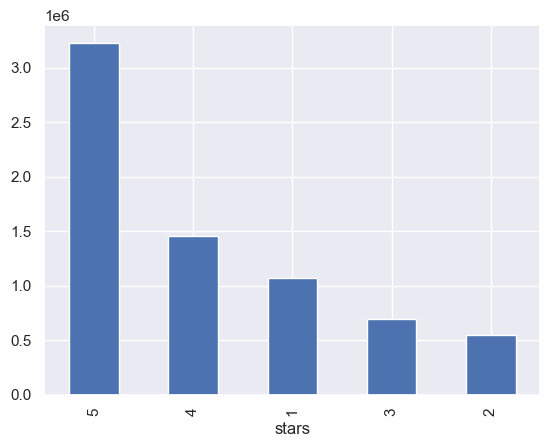

In [13]:
df["stars"].value_counts().plot(kind="bar")

Split the dataset to train and test subsets:

In [14]:
train_df = df.sample(frac=0.9, random_state=123)
test_df = df.drop(train_df.index)

In [15]:
print(f"Size of train set: {train_df.shape[0]}")
print(f"size of test set: {test_df.shape[0]}")

Size of train set: 6291252
size of test set: 699028


### Pre-trained sentiment analysis tools

In this section, we will explore the performance of general sentiment analysis tools against the Yelp dataset. The following tools will be considered:
* NLTK VADER (Hutto, C.J., Gilbert, E.E., 2014)
* TextBlob PatternAnalyzer
* BERT

#### NLTK VADER

This is a default sentiment analyzer suggested by NLTK. It is a rule-based.

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /home/sagemaker-
[nltk_data]     user/nltk_data...


True

Perform sentiment analysis on the test set:

In [15]:
sia = SentimentIntensityAnalyzer()

# variables defined outside the function are accessible inside the function only if you pass them as arguments, because
# the function is executed in a different thread:

def get_vader_sentiment(item, sia):
    return sia.polarity_scores(item["text"])['compound']

vader_results = test_df.p_apply(get_vader_sentiment, args=[sia], axis=1)

GET_VADER_SENTIMENT DONE:   0%|          | 0/699028 [00:00<?, ?it/s]

In [16]:
test_df["vader_results"] = vader_results

Let's compare the NLTK VADER results with a star rating. Before that, we need to normalize both values to the same scale:

In [17]:
test_df.describe()

,stars,vader_results
count,699028.000000,699028.000000
mean,3.747711,0.632018
std,1.477450,0.569262
min,1.000000,-0.999300
25%,3.000000,0.631700
50%,4.000000,0.913400
75%,5.000000,0.969400
max,5.000000,0.999800


Normalize both values to the same scale:

In [18]:
test_df["stars"] = MinMaxScaler().fit_transform(test_df[["stars"]])
test_df["vader_results"] = MinMaxScaler().fit_transform(test_df[["vader_results"]])

In [19]:
test_df.describe()

,stars,vader_results
count,699028.000000,699028.000000
mean,0.686928,0.816026
std,0.369362,0.284759
min,0.000000,0.000000
25%,0.500000,0.815867
50%,0.750000,0.956781
75%,1.000000,0.984793
max,1.000000,1.000000


Calculate the MSE, R2, and correlation metrics:

In [20]:
print(f"MSE = {mean_squared_error(test_df['stars'], test_df['vader_results'])}")
print(f"R2 = {r2_score(test_df['stars'], test_df['vader_results'])}")

MSE = 0.09522979245430209
R2 = 0.30197958386568025


Let's calculate the correlation between the star rating and the VADER compound score:

In [21]:
correlation = test_df['stars'].corr(test_df['vader_results'])
correlation

0.6605519898004749

The correlation is 0.66, which means that there is a moderate positive correlation between the star rating and the VADER compound score. Let's plot the distribution of the star rating and the VADER compound score:

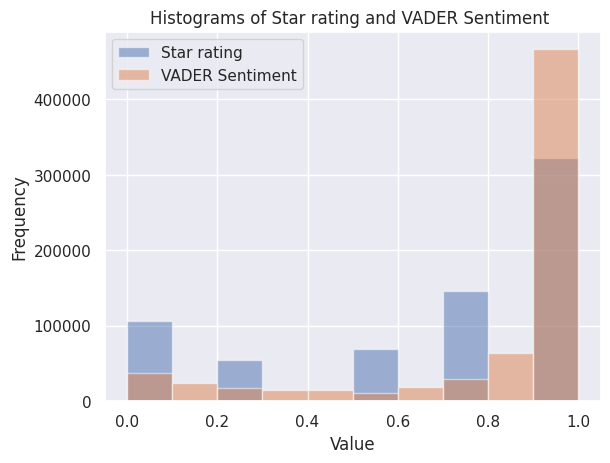

In [22]:
plt.hist(test_df['stars'], alpha=0.5, label='Star rating')
plt.hist(test_df['vader_results'], alpha=0.5, label='VADER Sentiment')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Star rating and VADER Sentiment ')
plt.legend()

# Show the plot
plt.show()


The correlation of the sentiment score and the star rating is 0.66, which means that there is a moderate positive correlation between the star rating and the VADER compound score. This result suggests that at least in some extent the star rating reflects the sentiment of the review text. While the results are promising, we will explore other tools to see if they can provide better results.

#### TextBlob

TextBlob is another Python library for processing textual data. It also provides two sentiment analysis implementations: PatternAnalyzer, based on a pattern library, and NaiveBayesAnalyzer, a Naive Bayes classifier trained on a movie reviews corpus. Let's use the default PatternAnalyzer:

In [24]:
# again, TextBlob can not be accessed from the function unless you pass it as an argument:
def get_textblob_sentiment(item, TextBlob):
    return TextBlob(item["text"]).sentiment.polarity

textblob_results = test_df.p_apply(get_textblob_sentiment, args=[TextBlob], axis=1)

GET_TEXTBLOB_SENTIMENT DONE:   0%|          | 0/699028 [00:00<?, ?it/s]

In [25]:
test_df["textblob_results"] = textblob_results

In [26]:
test_df["textblob_results"] = MinMaxScaler().fit_transform(test_df[["textblob_results"]])

Calculate the MSE, R2, and correlation metrics:

In [27]:
print(f"MSE = {mean_squared_error(test_df['stars'], test_df['textblob_results'])}")
print(f"R2 = {r2_score(test_df['stars'], test_df['textblob_results'])}")

MSE = 0.09889039192335959
R2 = 0.27514792647318165


In [28]:
correlation = test_df['stars'].corr(test_df['textblob_results'])
correlation

0.6365616480220859

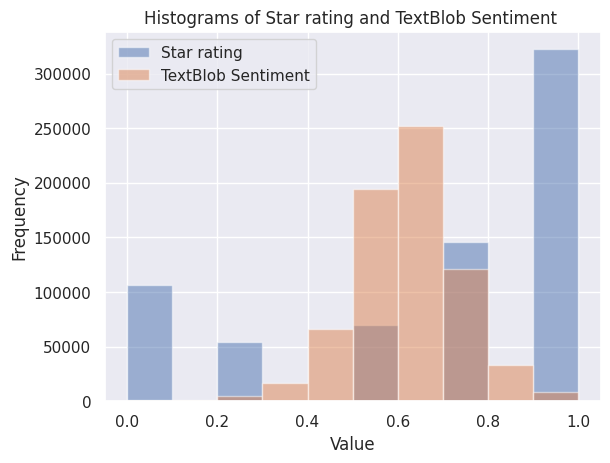

In [29]:
plt.hist(test_df['stars'], alpha=0.5, label='Star rating')
plt.hist(test_df['textblob_results'], alpha=0.5, label='TextBlob Sentiment')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Star rating and TextBlob Sentiment ')
plt.legend()

# Show the plot
plt.show()

The results are quite similar in terms of correlation, but NLTK VADER shows a slightly better distribution more close to the distribution of the star rating, while TextBlob's distribution is more like a normal distribution. Also, both approaches are quite fast. It took 1.5 minutes to process 700K reviews with NLTK VADER and less than a minute with TextBlob.

I have tried an alternative TextBlob's NaiveBayesAnalyzer classifier, but it was too slow each review took about 3 seconds to process, so I had to stop the execution.

#### BERT (Bidirectional Encoder Representations from Transformers)

In [41]:
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

tokenizer_config.json: 100%|██████████| 39.0/39.0 [00:00<00:00, 160kB/s]
vocab.txt: 100%|██████████| 872k/872k [00:00<00:00, 3.13MB/s]
special_tokens_map.json: 100%|██████████| 112/112 [00:00<00:00, 326kB/s]


In [47]:
def get_bert_sentiment(item, sentiment_pipeline):
    # Some reviews are too long for BERT to handle, so we truncate them to 512 tokens.
    # This is not ideal, but we can live with it for now.
    text = item["text"]
    if len(text) > 512:
        text = text[:512]

    return int(sentiment_pipeline(text)[0]["label"].split(" ")[0])

BERT is much slower than NLTK VADER or TextBlob, it took around 1 minute to process 1K reviews. So I had to limit the dataset to 5K reviews to get the results in a reasonable time:

In [50]:
bert_test_df = test_df[:5000]

In [51]:
bert_results = bert_test_df.progress_apply(get_bert_sentiment, args=[sentiment_pipeline], axis=1)

100%|██████████| 5000/5000 [05:22<00:00, 15.50it/s]


In [52]:
bert_test_df["bert_results"] = bert_results

/var/folders/v1/whtp_6_j3p3gwb_dgdz6gkpw0000gn/T/ipykernel_41169/3482497235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_test_df["bert_results"] = bert_results


In [53]:
bert_test_df["bert_results"].describe()

count    5000.000000
mean        3.806600
std         1.374181
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: bert_results, dtype: float64

In [55]:
bert_test_df["bert_results"] = MinMaxScaler().fit_transform(bert_test_df[["bert_results"]])

/var/folders/v1/whtp_6_j3p3gwb_dgdz6gkpw0000gn/T/ipykernel_41169/3053587106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_test_df["bert_results"] = MinMaxScaler().fit_transform(bert_test_df[["bert_results"]])


In [54]:
bert_test_df["stars"] = MinMaxScaler().fit_transform(bert_test_df[["stars"]])

/var/folders/v1/whtp_6_j3p3gwb_dgdz6gkpw0000gn/T/ipykernel_41169/2676023174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_test_df["stars"] = MinMaxScaler().fit_transform(bert_test_df[["stars"]])


Calculate the MSE, R2, and correlation metrics:

In [56]:
print(f"MSE = {mean_squared_error(bert_test_df['stars'], bert_test_df['bert_results'])}")
print(f"R2 = {r2_score(bert_test_df['stars'], bert_test_df['bert_results'])}")

MSE = 0.0485
R2 = 0.5826419585829801


In [57]:
correlation = bert_test_df['stars'].corr(bert_test_df['bert_results'])
correlation

0.7930357382694001

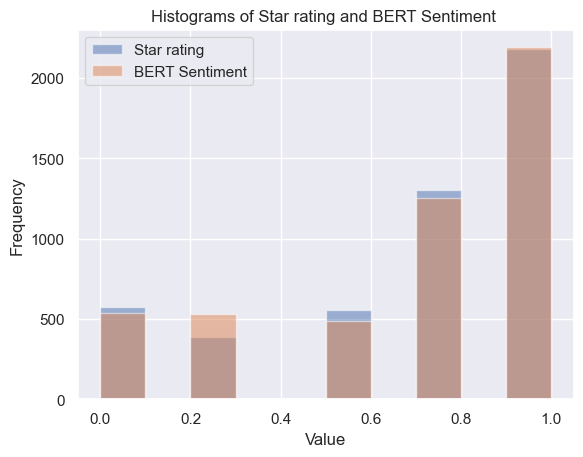

In [58]:
plt.hist(bert_test_df['stars'], alpha=0.5, label='Star rating')
plt.hist(bert_test_df['bert_results'], alpha=0.5, label='BERT Sentiment')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Star rating and BERT Sentiment ')
plt.legend()

# Show the plot
plt.show()

BERT doesn't perform that well on the Yelp dataset, it shows no correlation and their distributions are quite different. Being a deep learning model, BERT highly depends on the training data, so it is possible to improve the results by fine-tuning the model on the Yelp dataset. However, this is out of the scope of this project.

### Baseline model

#### Naive Bayes

Naive Bayes is a simple probabilistic classifier often used as a baseline for text classification tasks. It is a supervised learning method that uses the Bayes' theorem to calculate the probability of a class given a document. It is fast to train and predict, and it performs well in many real-world applications. However, it is inherently a classification algorithm, while all previous sentiment analysis tools were regression models that return continuous values. Anyway, it is worth trying to see how it performs compared to other tools.

Initialize CountVectorizer to convert text to a matrix of token counts. It does a basic preprocessing of the text, including tokenization, removing punctuation, and lowercasing. It also removes stop words:

In [14]:
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data with CountVectorizer:
X_train_vec = vectorizer.fit_transform(train_df['text'])

# Fit and transform the test data with CountVectorizer:
X_test_vec = vectorizer.transform(test_df['text'])

Use star-rating as labels:

In [15]:
y_train = train_df['stars']
y_test = test_df['stars']

Train the model:

In [16]:
nb = MultinomialNB()

nb.fit(X_train_vec, y_train)

MultinomialNB()

Evaluate the model:

In [17]:
y_pred = nb.predict(X_test_vec)

In [18]:
accuracy_score(y_test, y_pred)

0.6087924947212415

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.63      0.70      0.66    106735
           2       0.32      0.32      0.32     54507
           3       0.39      0.36      0.38     69432
           4       0.44      0.57      0.50    146060
           5       0.82      0.70      0.75    322294

    accuracy                           0.61    699028
   macro avg       0.52      0.53      0.52    699028
weighted avg       0.63      0.61      0.62    699028



#### Logistic Regression

Converting text to TF-IDF features

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

In [32]:
y = df['stars']

Split the dataset into training and testing sets for model validation:

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model (it takes about 1 hour to train the model on Apple M1 16 GB RAM):

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluate the model:

In [38]:
# Predict the sentiment of the test set:

y_pred = model.predict(X_test)

print(f"MSE = {mean_squared_error(y_test, y_pred)}")
print(f"R2 = {r2_score(y_test, y_pred)}")

MSE = 0.7132473538700456
R2 = 0.6737257060586066


#### Support Vector Machine (SVM)

In contrast to Naive Bayes, SVM can be used for both classification and regression tasks. It is a supervised learning method that uses a hyperplane to separate classes. However, it is computationally expensive and requires a lot of memory to train. Let's see how it performs on the Yelp dataset.

The fit time complexity of the SVR algorithm is more than quadratic with the number of samples which makes it hard to scale. It is not possible to run training on the full dataset, so limit the dataset to 70K reviews (roughly 1% of the full dataset):

In [21]:
svm_df = df.sample(frac=0.01, random_state=123)

In [22]:
svm_df.count()

stars    69903
text     69903
dtype: int64

In [23]:
svm_df["stars"] = MinMaxScaler().fit_transform(svm_df[["stars"]])

Feature extraction:

In [24]:
vectorizer = TfidfVectorizer(stop_words="english")

X = vectorizer.fit_transform(svm_df['text'])
y = svm_df['stars']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

Train the model:

In [26]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

Evaluate the model:

In [27]:
y_pred = svr.predict(X_test)

In [28]:
print(f"MSE = {mean_squared_error(y_test, y_pred)}")
print(f"R2 = {r2_score(y_test, y_pred)}")

MSE = 0.04453992722709433
R2 = 0.6742206178593498


## Conclusions

### Summary of the results

#### Pre-trained sentiment analysis tools (regression)

| Model       | MSE    | R2     |
| ----------- | ------ | ------ |
| NLTK VADER  | 0.095  | 0.302  |
| TextBlob    | 0.098  | 0.275  |
| **BERT**        | **0.049**  | **0.583**  |


#### Baseline models (classification)

| Model                          | Accuracy    | Precision   | Recall | F1 Score |
| ------------------------------ | ----------- | ----------- | ------ | -------- |
| Naive Bayes (CountVectorizer)  | 0.61        | 0.63        | 0.61   | 0.62     |

#### Baseline models (regression)

| Model                          | MSE         | R2          |
| ------------------------------ | ----------- | ----------- |
| Logistic Regression (TF-IDF)   | 0.713       | 0.673       |
| Support Vector Machine (TF-IDF)| **0.045**       | **0.674**       |



## References

Yelp Inc. (2012) _Survey: 85% of Consumers Use the Internet to Find Local Businesses_ [Online] Available from: https://blog.yelp.com/businesses/survey-85-of-consumers-use-the-internet-to-find-local-businesses/ [19 December 2023].

Luca, M. (2011) _Reviews, Reputation, and Revenue: The Case of Yelp.Com_ [Online] Available from: https://www.hbs.edu/ris/Publication%20Files/12-016_a7e4a5a2-03f9-490d-b093-8f951238dba2.pdf [19 December 2023].

Hutto, C.J., Gilbert, E.E. (2014) _VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text._ [Online] Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014. Available from: https://ojs.aaai.org/index.php/ICWSM/article/view/14550/14399 [20 December 2023].

Martiti, Juliane C. (2021) _Implementation of Naive Bayes Algorithm on Sentiment Analysis Application_ [Online] Informatics Engineering Department, STMIK AMIK Bandung, Indonesia Available from: https://www.researchgate.net/publication/357216457_Implementation_of_Naive_Bayes_Algorithm_on_Sentiment_Analysis_Application [20 December 2023].

Satia Budhi G., Chiong R., Pranata I., Hu Z. (2021) _Using Machine Learning to Predict the Sentiment of Online Reviews: A New Framework for Comparative Analysis_ [Online] Available from: https://repository.petra.ac.id/20065/1/Publikasi1_02030_6879.pdf [21 December 2023].

Devlin J., Chang M., Lee K., Toutanova K. (2018) _BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding_ [Online] Available from: https://arxiv.org/abs/1810.04805 [20 December 2023].

Sanh V., Debut L., Chaumond J., Wolf T. (2020) _DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter_ [Online] Available from: https://arxiv.org/abs/1910.01108 [22 December 2023].

Yelp Inc. (2023) _Yelp Open Dataset_ [Online] Yelp Inc. Available from: https://www.yelp.com/dataset [19 December 2023].